* Este notebook é baseado no módulo facilitado por [Gabriela Cavalcante](https://github.com/gabicavalcante) no curso [Python para Inovação Cívica](https://escoladedados.org/courses/python-para-inovacao-civica/) da Escola de Dados. O material foi editado por Anicely Santos.*

# **Extraindo dados HTML com Python**

Antes de mais nada, se você caiu aqui de paraquedas e não sabe bem como funciona o Python ou a biblioteca Pandas, [comece seus primeiros passos aqui](https://escoladedados.org/tutoriais/primeiros-passos-com-python-e-pandas-para-analise-de-dados/). Esse tutorial mostrará duas maneiras de coletar dados disponíveis na web: utilizando o pacote `requests-html` e a função `read_html` do Pandas.

Esse notebook cobre os seguintes assuntos:

*   O que é web scraping
*   Estrutura de uma página web
  * HTML
  * CSS
*   Pacote requests-html
 *  Instalando o pacote
 *  Conectando com a URL
*   Extraindo dados da agenda do governador do Rio de Janeiro
 *  Organizando os dados em um Data Frame
*   Raspando dados com Pandas
*   Extraindo dados dos parlamentares de Pernambuco



# O que é web Scraping

Web scraping basicamente é o processo de raspar ou extrair dados da web. Esse processo pode ser simples, como os métodos que veremos aqui), mas também pode ser um pouco mais complexo, envolvendo por exemplo sistemas com CAPTCHA, requisições mais complexas para o site e etc. Como este é um tutorial introdutório, optamos por mostrar alguns exemplos básicos.

Geralmente, essa técnica é usada quando os dados que precisamos ainda não estão disponíveis de maneira aberta (em um CSV, por exemplo) para manipulação. Então, antes de raspar dados de algum site, certifique-se que a informação já não está disponível em dados abertos e estruturados.



# Estrutura de uma página web

Uma página web básica, geralmente é composta de 3 estruturas: HTML, CSS e JavaScript. Aqui não vamos nos aprofundar em todas, mas precisaremos entender o básico da estrutura HTML e CSS para facilitar o inspecionamento de elementos que faremos logo mais. Vamos começar com a estrutura principal, o HTML.


**HTML**

HTML (Hypertext Markup Language) é um arquivo simples de texto que utiliza tags para ajudar os navegadores a processar páginas Web. Em outras palavras, o HTML é a base de uma página web.

Veja um exemplo de um código HTML:

```html
<html>
<body>
    <script></script>
    <style>
    </style>

    <div id='pessoas'>
        <h2>Pessoas:</h2>
    </div>
    <a href='#' id="novaPessoa">Nova pessoa</a>

    <div id='resultados'>
        <h2>Resumo:</h2>
    </div>
    <script src="observacao.js"></script>
    <script src="insercao.js"></script>
</body>
</html>

```

Como você pode ver, as tags (que estão entre os sinais `< >`) abrem e fecham, quando há uma barra após o `<`.

Por exemplo: `<body>` abre a tag do corpo da página HTML e `</body>` a fecha. Tudo que estiver entre isso é considerado como parte do conteúdo HTML. É possível ter páginas que sejam construídas usando apenas HTML, inclusive era dessa maneira bem no início da internet. Porém, hoje é mais comum utilizar uma outra estrutura que proporcione aparências mais amigáveis ao sites. Estamos falando do CSS.

**CSS**

CSS (Cascading Style Sheets) é uma sequência estilos que podem conversar com o HTML através das próprias tags dele, ou usando classes e IDs que são chamado de seletores. Um exemplo de como o CSS funciona é pensar em um documento que você digita. O texto sem nenhum formato seria o HTML. A inclusão de negrito, parágrafo, cor e tipo de fonte seria o CSS. 

Exemplo de uma folha de estilo CSS:
```css
body {
  margin: 25px;
  background-color: rgb(255,215,0);
  font-family: arial, sans-serif;
  font-size: 14px;
}

.header {
  font-size: 35px;
  font-weight: normal;
  margin-top: 5px;
}

#footer {
  font-size: 15px;
}
```
O que o CSS está fazendo nesse trecho de código é dizer ao HTML (que por sua vez dirá ao navegador) para colocar a cor amarela (`rgb(240,240,240`) em todo os site, através da tag `body`, e tudo que for escrito deve aparecer no formato da fonte arial (`font-family: arial`) no tamanho 14 (`font-size: 14px`). 

Como falado anteriormente, o CSS tanto pode incluir estilo direto na tag HTML, quanto pode usar uma classe ou ID. Uma classe é composta de ponto `.` mais o nome da classe e o ID é composto de jogo da velha `#` mais nome da ID. Nesse exemplo temos a classe header (`.header`) e o ID footer (`#footer`).

Um bom exercício é você parar um minuto e ir olhar como é a estrutura do seu site preferido, as tags, classes e IDs que ele possui. Utilize a ferramenta do desenvolvedor pra isso, pressionando simultaneamente as teclas `ctrl` + `Shift` + `i`.  

Para saber mais: [HTML básico](https://developer.mozilla.org/pt-BR/docs/Learn/Getting_started_with_the_web/HTML_basics) e [CSS básico](https://developer.mozilla.org/pt-BR/docs/Learn/Getting_started_with_the_web/CSS_basics).


# Pacote requests-html

Bom, depois de entender melhor como é a estrutura de uma página web, vamos agora entender um pouco sobre o pacote que usaremos para extrair os compromissoes da [agenda do governador do Rio e Janeiro](http://www.rj.gov.br/Agenda.aspx). 

O pacote `requests-html` serve para extrair dados HTML de maneira simples. Com ele, você consegue pegar conteúdos de páginas web, independente de estarem ou não em uma estrutura tabular. Ele consegue "enxergar" se os dados estiverem em uma tag, em um seletor css, entre outras opções. Para entender detalhes sobre o pacote, [consulte a documentação](https://docs.python-requests.org/projects/requests-html/en/latest/).




**Instalando o pacote**

Essa é um pacote de terceiros e por esse motivo precisamos instalar antes de fazer a importação. Para fazer a instalação de qualquer pacote basta usar o instalador Python chamado `pip install` seguido do nome do pacote. 

Rode a célula a seguir para realizar essa importação: 

In [ ]:
!pip install requests-html

     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 103 kB 47.6 MB/s 
     |████████████████████████████████| 138 kB 46.8 MB/s 
     |████████████████████████████████| 127 kB 53.1 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=b751e03756a1210259ab50aa7b4f5a95612fa778328330b7d1127fa18ff982d0
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=eee399b43e57675cc066850848af5bdd43d3fd68db80c6a99545c34d3a8104a5
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

Após instalado, reinicie o ambiente de execução clicando em `RESTART RUNTIME` na mensagem que aparece no final do instalação. 

**Conectando com a URL**

Agora podemos importar o pacote e então começar a utiliza-lo. Desse pacote iremos utilizar o módulo HTMLSession. 

Rode a célula a seguir para fazer essa importação:

In [ ]:
from requests_html import HTMLSession

Tudo pronto, vamos começar! o/


# Extraindo dados da agenda do governador do Rio de Janeiro


Vamos começar salvando o endereço do site que queremos dentro de uma url, dessa maneira temos um texto mais curto para trabalhar durante todo o código, sem precisar repetir essa URL enorme.

In [ ]:
url = ('http://www.rj.gov.br/Agenda.aspx')

O módulo `HTMLSession` é reponsável por iniciar uma sessão. Essa sessão é quem irá fazer nossa comunicação com a página da agenda e assim conseguiremos "solicitar os dados" que queremos extrair do navegador.

In [ ]:
session = HTMLSession()

Com a sessão iniciada, podemos começar a fazer pedidos ao navegador. Vamos dizer a sessão que esses pedidos acontecerão para o site que indicamos na variável url. Salvaremos os resultados dessa "mensagem" na variável r.

In [ ]:
r = session.get(url)

Para saber se a solicitação deu certo, precisa apresentar o status `response 200`. Se você não conhece os status de requisição HTTP, [vale conferir este artigo](https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status).

Rode a célula a seguir para saber se deu tudo certo.

In [ ]:
r

<Response [200]>

Ótimo! Já conseguimos estabelecer uma conexão. Agora podemos fazer inúmeras operação utilizando essa solicitação contida na variável r. Esse é o grande trunfo de utilizar variáveis.

Com os aprendizados sobre estrutura de páginas web, vamos inspecionar a página e procurar o conteúdo que queremos dentro da estrutura HTML. Você deve ter percebido que a medida que você toca nas tags elas selecionam na página o que elas estão armazenando. 

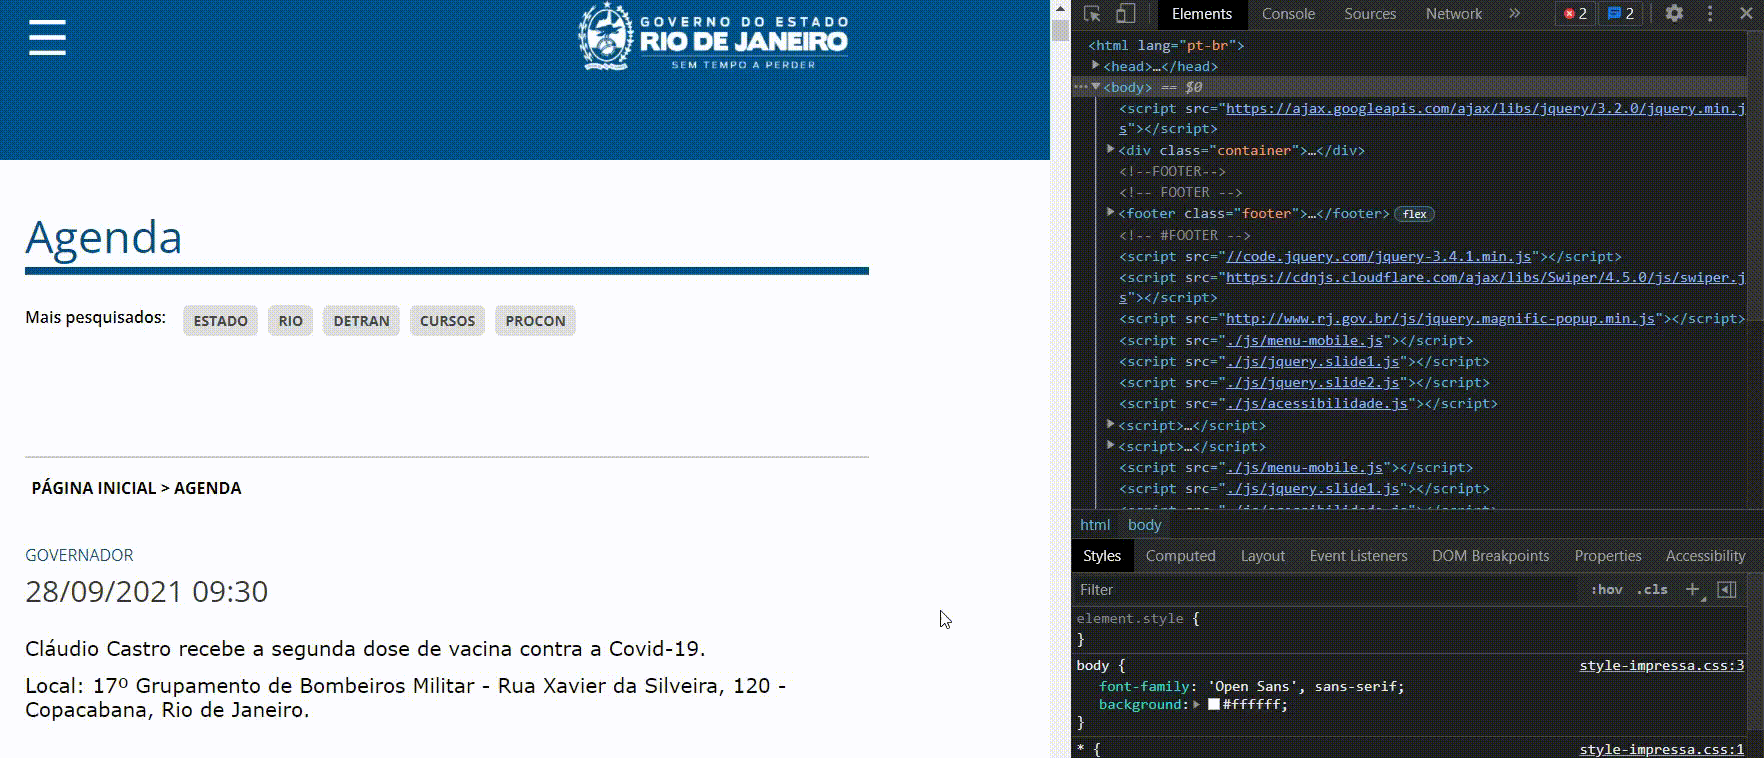

Nós descobrimos que todos os compromissos da agenda estão guardados dentro de várias  tag `div` que tem uma classe chamada `.noticias-wrap`. Agora é preciso fazer o pacote requests pegar esse conteúdo na página. Podemos fazer isso usando o método `find()`. Esse método é usado para encontrar o que você passar para ele dentro dos parênteses entre aspas.

In [ ]:
agenda = r.html.find('.noticias-wrap')

Vamos vê se ele encontrou certinho?

In [ ]:
agenda

Perceba que ele pegou todas as classes que levavam esse nome. Porém, não queremos o nome das tags e/ou classes, queremos o que elas estão guardando. Para pegar esse conteúdo usaremos o `.text`, ele vai traduzir para nossa linguagem humana o que as tags estão dizendo ao navegador.

Tudo que o `find` encontrou, ele armazenou em uma lista. Para pesquisar elementos em uma lista basta passar o nome da lista mais o índice entre colchetes. 

In [ ]:
agenda[0].text

'GOVERNADOR\n28/09/2021 09:30\nCláudio Castro recebe a segunda dose de vacina contra a Covid-19.\nLocal: 17º Grupamento de Bombeiros Militar - Rua Xavier da Silveira, 120 - Copacabana, Rio de Janeiro.'

Se você conferir na agenda, o índice 0 é compromisso mais atual do governador. Maravilha, temos agora todos os compromissoes. Mas, ainda precisamos organizar todo esse conteúdo dentro de um Data Frame. 

**Organizando os dados em um Data Frame**

Antes de tudo vamos importar a biblioteca `Pandas`. Ela será a responsável por armazenar tudo bonitinho dentro de uma tabela.

In [ ]:
import pandas as pd

Bom, certamente você deve ter percebido que os dados que extraimos estão todos juntos, isso ficaria muito bagunçado dentro de uma tabela. Vamos tentar separar o conteúdo de data e descrição. A agenda do governador é algo que está em constante atualização, se você rodar esse sript amanhã, a lista já terá aumentado. O melhor a se fazer nesses casos, é armazenar o tamanho dentro de uma variável, usando o método `len()` que retorna o tamanho de uma lista. Esse passo será muito importante para o que vem a seguir.

In [ ]:
tamanho = len(agenda)

Para separar tudo, vai ser preciso entrar dentro da lista e ir separando de um lado as datas e do outro os compromissos relacionados, isso para cada compromisso. Imagine fazer isso manualmente, quanto tempo levaria? Muito tempo. Por ser uma tarefa que se repete várias vezes, podemos faze-la utilizando um laço de repetição. Essa ação está dividida em etapas que explicarei a seguir.

In [ ]:
#Etapa 1
compromisso = []

#Etapa 2
for item in agenda[:tamanho]:
#Etapa 3
  linha = {}
  linha['dia'] = item.find('h1')[0].text

#Etapa 4
  textos = []
  descricao = item.find('div>p')

#Etapa 5
  for leia in descricao:
    texto = ''.join(leia.text).strip()
#Etapa 6
    if texto:
      textos.append(texto)
#Etapa 7
  linha['descricao'] = '\n'.join(textos)
  compromisso.append(linha)

Entenda passo a passo o que aconteceu:

* **Etapa 1**: Criei uma lista vazia e chamei de `compromisso`. Essa lista vai servir como uma "caixa" para armazenar tudo que eu for separando.

* **Etapa 2**: Como falei, para separar precisamos entrar dentro da variável `agenda` e ir pegando item a item. Nesse `for` estou fazendo exatamente isso. Lembra da variável `tamanho` que criamos? ela está sendo usada agora para dizer que a variável `item` passe por toda a agenda (`agenda[:tamanho]`).

* **Etapa 3**: Dentro do `for` eu crie um dicionário chamado linha. Com esse dicionário eu vou criar a chaves relacionado aos valores que eu for separando. A primeira chave que criei foi `dia` (`linha['dia']`) e nela salvarei todos os valores de data que estão armazenados na tag `h1`, conforme vimos no inspencionamento de elementos. O `[0]` é para dizer que ele comece armazenando a partir do primeiro`.

* **Etapa 4**: A descrição do compromisso na agenda é um conteúdo mais extenso, sendo assim eu criei uma outra lista vazia chamada `texto` para armazenar exclusivamente esse conteúdo. Na variável `descricao` estou pedindo que ele encontre os conteúdos que estão armazendos nas tags `div > p`. O sinal `>` "obriga" que ele pegue tudo de `p` que está ligado a essa `div`.

* **Etapa 5**: Esse `for` está acontecendo dentro do `for` anterior para poder continuar pegando as informações relacionadas a `agenda`. Agora a variável `leia` está passando por dentro da lista de `descricao` e salvando tudo que encontra dentro da variável `texto`, concatenando o espaço vazio(`''`) com o texto que for encontrado (`.join(leia.text)`). O `strip()` é para tirar todos os `\n` da maioria do texto que vei junto quando os dados foram raspados.

* **Etapa 6**: Você deve ter percepido que nem todas tags `p` tem conteúdo, para evitar que ele armazene conteúdo vazio, incluí esse `if`. Ele garante que se existir texto (`if texto`) salve dentro da lista `texto` (`textos.append(texto))`.

* **Etapa 7**: Dentro do primeiro `for` vou criar no dicionário `linha` a chave `descricao` e salvar o conteúdo da lista `textos` pulando uma linha (`\n`). Por fim, salvarei o diconário `linha` dentro da lista `compromisso` (`compromisso.append(linha)`).




Ufa! Muitas etapas, mas o importante é que conseguiremos um bom resultado no final. Vamos vê como fica tudo isso dentro de um Data Frame? Armazenaremos esse Data Frame na variável `df`.

In [ ]:
df = pd.DataFrame(compromisso)

Se você quiser visualizar o conteúdo, basta passar o método `head`. Esses `\n` que aparecem são os que incluímos para o conteúdo quebrar linha.

In [ ]:
df.head(10)

dia                                          descricao
0  27/09/2021 12:00  Inauguração do Centro Integrado de Segurança P...
1  24/09/2021 09:00  Despachos internos.\nLocal: Palácio Guanabara ...
2  23/09/2021 09:00  Despachos internos.\nLocal: Palácio Guanabara ...
3  22/09/2021 09:30  Lançamento do Plano Estratégico Novo Rumo São ...
4  21/09/2021 09:00  Despachos internos.\nLocal: Palácio Guanabara ...
5  20/09/2021 09:00  Despachos internos.\nLocal: Palácio Guanabara ...
6  17/09/2021 09:00  Anúncio da retomada das obras de construção do...
7  16/09/2021 10:00  Lançamento do programa habitacional Casa da Ge...
8  15/09/2021 17:00  Entrega do certificado com valores da concessã...
9  15/09/2021 16:00  Entrega do certificado com valores da concessã...

Agora que temos um Data Frame pronto, você pode usar as ferramentas do Pandas para fazer limpezas, análises diversas e caso deseje salve os resultados usando o `to_csv`. 

In [ ]:
df.to_csv('meu_csv.csv')

# Raspando dados com Pandas

Existe um jeito bem mais simples de raspar dados. O problema é que dessa maneira não temos tanta liberdade para navegar pela estrutura do navegador e esse método que apresentaremos só funciona em dados que estejam tabulados, ou seja, dentro de uma estrutura HTML de tabela. 

A biblioteca Pandas possui diversas funções para carga de arquivos com nomes bastante intuitivos, sendo sempre `read` seguido do tipo de arquivo que você deseja carregar, por exemplo, `read_csv`, `read_excel`, entre outros. Vamos conhecer agora o método `read_html`.

 

 O `read_html` consegue carregar tanto um arquivo HTML, como uma URL (link de um site), detectando "sozinho" as tabelas que existem na página ou aquivo e retornando uma lista com essas tabelas HTML, organizadas dentro de um Data Frame Pandas.  

# Dados de parlamentares de Pernambuco

Iremos extrair uma lista de deputados federais eleitos do estado de Pernambuco, como exemplo de funcionamento desse método. Lembrando que esses dados podem ser baixados com ainda mais informações no site do [Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1). O método usado aqui é unicamente para fins didáticos. 

Como já importamos a biblioteca Pandas anteriormente, não precisamos fazer novamente. Mas se você começou a ler a partir dessa etapa, inicie importando a biblioteca.

Começaremos armazenando a URL em uma variável:

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Pernambuco'

Passaremos a variável como argumento da função e armazenaremos as informações extraidas pelo `read_html` para variável `df`.

In [ ]:
df = pd.read_html(url)

O `read_html` armazena em uma lista as tabelas que ele encontrar dentro da página. Vamos ver quantas tabelas ele encontrou? Usaremos o `len()`. 

In [ ]:
print(f'Número de Dataframes: {len(df)}')

Número de Dataframes: 4


Sabemos que nessa página possui 4 tabelas, mas qual é a que queremos? Você pode usar o método `info()` para descobrir, testando cada índice do Dataframe na variável `df`, entre colchetes.

In [ ]:
df[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Deputados federais eleitos  186 non-null    object
 1   Naturalidade                186 non-null    object
 2   Mandatos                    186 non-null    int64 
 3   Ano da eleição              186 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


Descobrimos então que a tabela que queremos é de índice 1. Vamos salvar esse resultado na variável `deputados_pe`.

In [ ]:
deputados_pe = df[1]
deputados_pe

Deputados federais eleitos  ...                                     Ano da eleição
0            Inocêncio Oliveira  ...  1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002...
1                Osvaldo Coelho  ...     1966, 1978, 1982, 1986, 1990, 1994, 1998, 2002
2        Ricardo Fiuza[nota 11]  ...     1970, 1974, 1978, 1982, 1986, 1990, 1998, 2002
3              Gonzaga Patriota  ...     1986, 1994, 1998, 2002, 2006, 2010, 2014, 2018
4         José Mendonça Bezerra  ...           1982, 1986, 1990, 1994, 1998, 2002, 2006
..                          ...  ...                                                ...
181  João Campos[5][6][nota 35]  ...                                               2018
182              Marília Arraes  ...                                               2018
183               Ossesio Silva  ...                                               2018
184          Sílvio Costa Filho  ...                                               2018
185               Túlio Gadêlha  ...                                               2018

[186 rows x 4 columns]

Super rápido e simples! <br>
Agora você pode usar os métodos Pandas para manipular o DataFrame como preferir, por exemplo trazerendo os 5 primeiros resultados do DataFrame usando o `head()`...

In [ ]:
deputados_pe.head()

...ou usando o `groupby` para descobrindo onde nasceu a maioria dos deputados eleitos. 


In [ ]:
deputados_pe.groupby('Naturalidade')['Ano da eleição'].count().sort_values(ascending=False)

Naturalidade
Recife, PE                   80
Caruaru, PE                   6
Nazaré da Mata, PE            5
Limoeiro, PE                  4
Rio de Janeiro, RJ            4
                             ..
Igarassu, PE                  1
Guarabira, PB                 1
Glória do Goitá, PE           1
São Bento do Norte, RN        1
Afogados da Ingazeira, PE     1
Name: Ano da eleição, Length: 66, dtype: int64

Enfim, as possibilidades são inúmeras, use sua curiosidade e criatividade e caso deseje, salve os resultados no final em um csv.